## Building a model to predict smoking behaviors
**This is private data. Please do not share**

* __Date:__ 2017 - 12 - 07
* __Version:__ 1.0
* __Editors:__ Fionn Delahunty 
* __Code:__ R

------- 
This notebook (R code) investigates if DOSPERT Scale (Risk Taking in a Recreational context) as a predictor of the number cigarette smoked in the sample data

Summary of steps
1. Dataset import 
2. Testing distribution of self control measure 
3. Testing distribution of car crash measure 
4. Analysis of Approach 1
5. Analysis of Apporach 2 
6. Summary
------


In [1]:
print ("hello")

[1] "hello"


## 1.Dataset Import

In [2]:
# Dataset Import 
data <- read.csv(file="Risklab_2.5.csv", header=TRUE, sep=",")
names(data)
head(data)

[1] "ID"                                                                            
 [2] "X"                                                                             
 [3] "Timestamp"                                                                     
 [4] "GENDER"                                                                        
 [5] "AGE"                                                                           
 [6] "DATE_OF_BIRTH"                                                                 
 [7] "NATIONALITY"                                                                   
 [8] "COUNTRY_OF_RESIDENCE"                                                          
 [9] "ENGLISH_FIRST_LENGUAGE"                                                        
[10] "IF_NOT_ENGLISH_SPECIFY"                                                        
[11] "HIGHEST_LEVEL_EDUCATION"                                                       
[12] "OCCUPATION"                                                                    
[13] "DOMINANT_HAND"                                                                 
[14] "DO_YOU_DRIVE"                                                                  
[15] "CURRENTLY_LEARNING_DRIVE"                                                      
[16] "CURRENTLY_HOLD_LEARNING_DRIVER_PERMIT"                                         
[17] "CURRENTLY_HOLD_FULL_DRIVING_LICENSE"                                           
[18] "RECEIVE_FULL_DRIVING_LICENSE"                                                  
[19] "AGE_STARTED_DRIVING"                                                           
[20] "AVERAGE_KM_MILEAGE_PER_YEAR"                                                   
[21] "HAVE_PENALTY_POINTS"                                                           
[22] "PENALTY_POINTS_FOR_WHAT"                                                       
[23] "COLLISIONS_LAST_TWO_YEARS"                                                     
[24] "HOW_MANY_COLLISIONS_LAST_TWO_YEARS"                                            
[25] "HOW_SERIOUS_COLLISIONS"                                                        
[26] "FOR_HOW_MANY_WERE_CULPABLE"                                                    
[27] "EVER_SMOKED"                                                                   
[28] "SMOKE_CURRENTLY"                                                               
[29] "HOW_MANY_YEARS_SMOKING"                                                        
[30] "HOW_MANY_CIGARETTES_PER_WEEK"                                                  
[31] "EVER_DRANK_ALCOHOL"                                                            
[32] "DRINK_CURRENTLY"                                                               
[33] "HOW_MANY_YEARS_DRINKING"                                                       
[34] "HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK"                                            
[35] "PREVIOUSLY_DIAGNOSED_HEALTH_CONDITION_REQUIRING_SIGNIFICANT_LIFESTYLE_CHANGES."
[36] "CONSIDER_YOURSELF_RISKTAKER"                                                   
[37] "DEAL_WITH_RISK_AND_UNCERTANTLY_DAILY_BASIS"                                    
[38] "Admitting.that.your.tastes.are.different.from.those.of.a.friend"               
[39] "BIS_Cog_Instability"                                                           
[40] "BIS_Perseverance"                                                              
[41] "BIS_self_control"                                                              
[42] "BIS_Cog_Complexity"                                                            
[43] "DOS_Ethical"                                                                   
[44] "DOS_Fin_Investment"                                                            
[45] "DOS_Fin_Gambling"                                                              
[46] "DOS_HealthSafety"                                                              
[47] "DOS_Recreational"                      

ID,X,Timestamp,GENDER,AGE,DATE_OF_BIRTH,NATIONALITY,COUNTRY_OF_RESIDENCE,ENGLISH_FIRST_LENGUAGE,IF_NOT_ENGLISH_SPECIFY,...,DOS_Fin_Gambling,DOS_HealthSafety,DOS_Recreational,DOS_Social,Number_of_Crashes,BIS_Crashes,Smoking,BIS_self_control_2,BIS_High,BIS_Low
64436,861,7/19/13 14:47,Female,22,3/27/91,American,USA,Yes,NA,...,8,30,40,38,NA,NA,1,9,0,1
65051,575,6/20/13 17:34,Male,19,03/08/1993,Mexican,Ireland,No,Spanish,...,10,35,34,31,2,9,28,9,0,1
62973,218,5/29/13 12:08,Female,20,3/14/93,Irish,Ireland,Yes,NA,...,9,29,34,35,1,10,3,10,0,1
65090,1237,10/14/13 10:47,Female,27,8/14/85,Irish,Ireland,Yes,NA,...,9,26,22,40,NA,NA,7,10,0,1
64000,883,7/22/13 08:41,Female,20,7/18/92,Irish,Ireland,Yes,NA,...,3,27,20,30,NA,NA,20,10,0,1
63825,238,5/30/13 16:13,Male,25,05/12/1988,Irish,Ireland,Yes,NA,...,17,31,40,40,NA,NA,40,10,0,1


## 2. Correlation martix

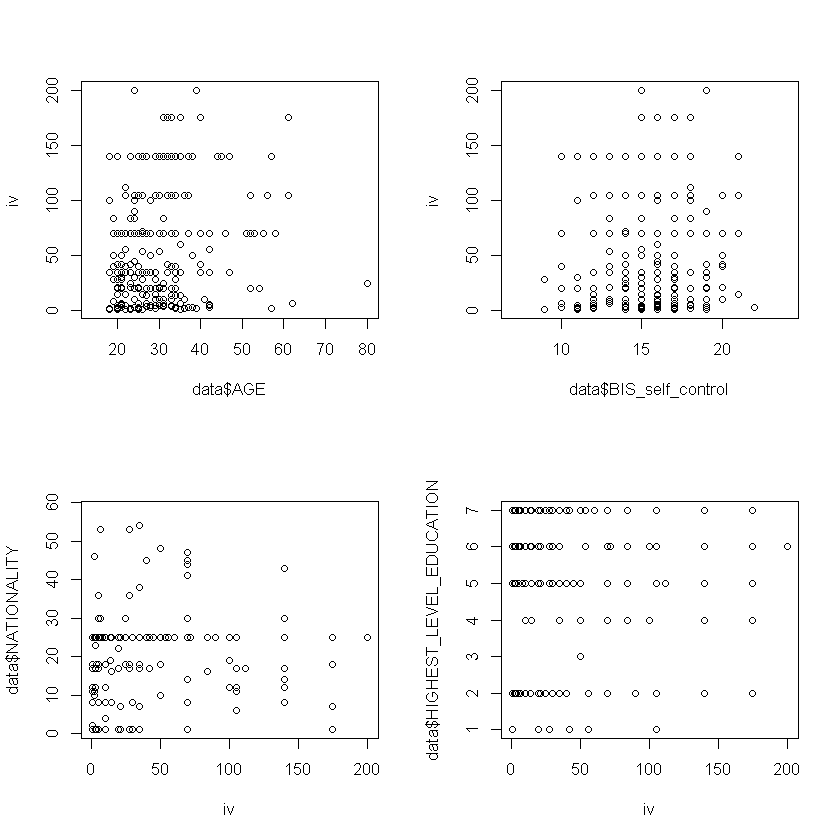

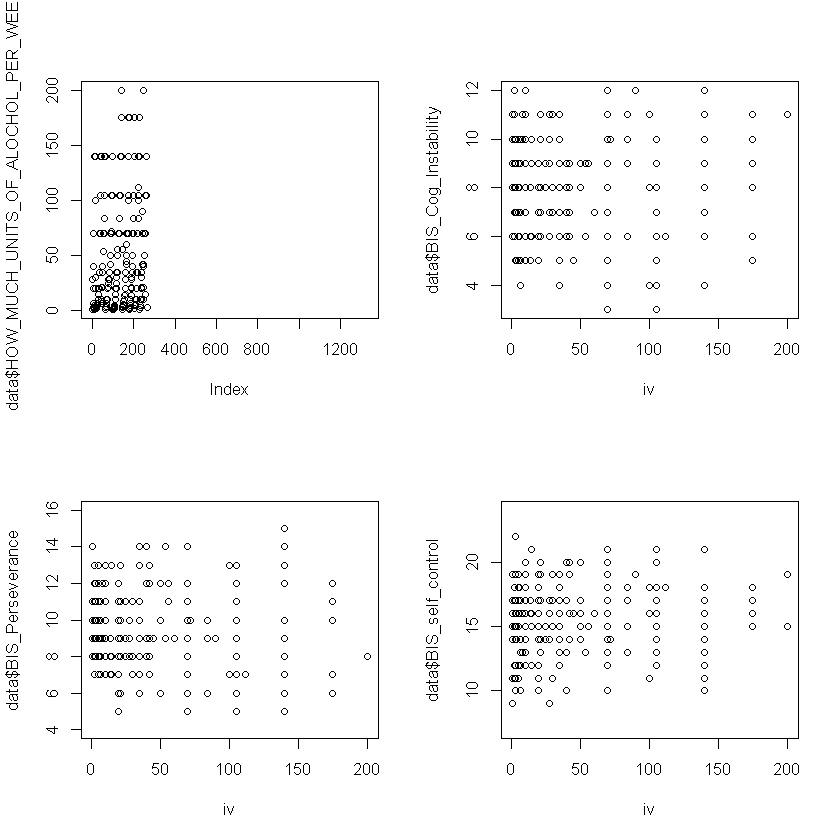

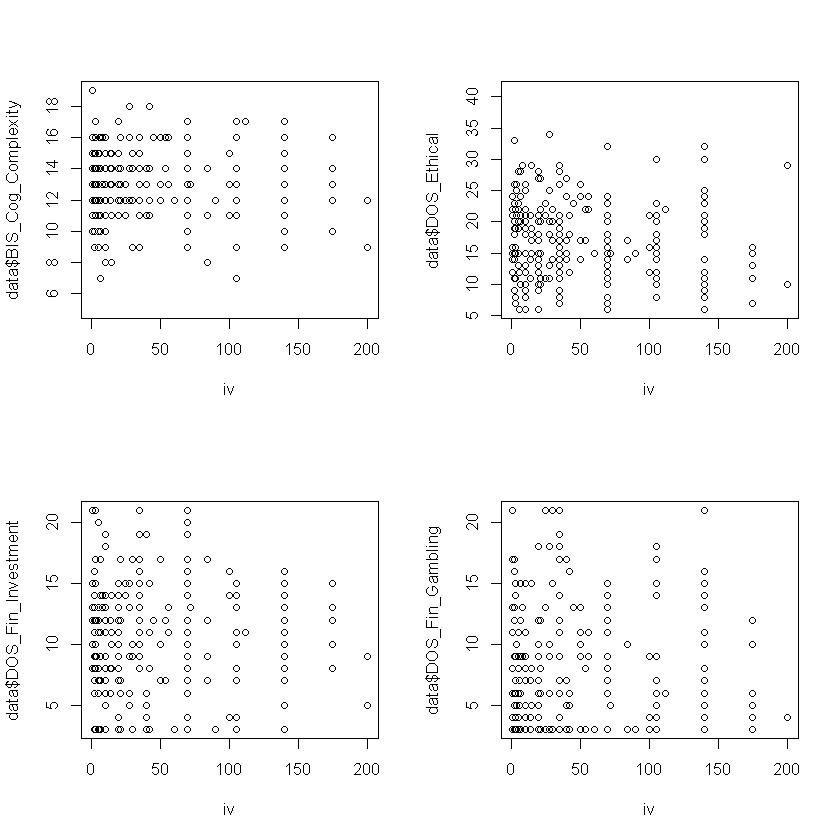

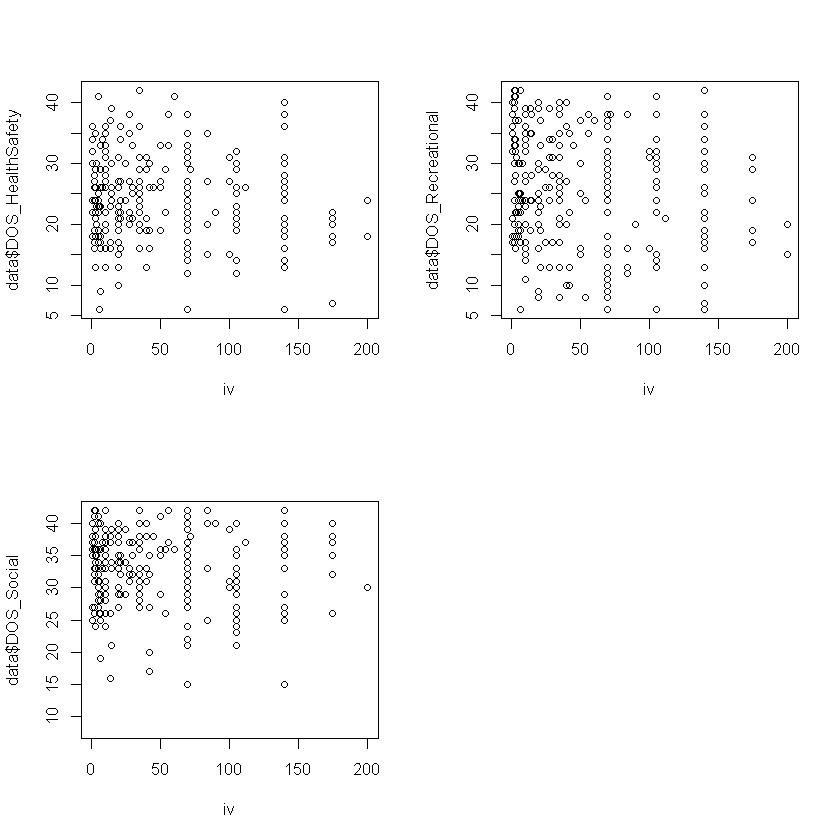

In [26]:
iv <- data$Smoking 

par(mfrow=c(2,2))
plot(data$AGE,iv)
plot(data$BIS_self_control,iv)
plot(iv,data$NATIONALITY)
plot(iv,data$HIGHEST_LEVEL_EDUCATION)
plot(iv,data$HOW_MUCH_UNITS_OF_ALOCHOL_PER_WEEK)
plot(iv,data$BIS_Cog_Instability)
plot(iv,data$BIS_Perseverance)
plot(iv,data$BIS_self_control)
plot(iv,data$BIS_Cog_Complexity)
plot(iv,data$DOS_Ethical)
plot(iv,data$DOS_Fin_Investment)
plot(iv,data$DOS_Fin_Gambling)
plot(iv,data$DOS_HealthSafety)
plot(iv,data$DOS_Recreational)
plot(iv,data$DOS_Social)

p<-locator()

In [43]:
unique(data$HIGHEST_LEVEL_EDUCATION)
#data$HIGHEST_LEVEL_EDUCATION

[1] Third Level (Cert/Diploma/General degree)
[2] Secondary (Leaving Cert)                 
[3] Third Level (Honours degree)             
[4] Fourth Level                             
[5] Secondary (Inter/Junior Cert)            
[6] 7                                        
[7] Primary                                  
7 Levels: 7 Fourth Level Primary ... Third Level (Honours degree)

In [56]:
library(ggplot2) 

airquality <- (data$HIGHEST_LEVEL_EDUCATION,data$Smoking)
p10 <- ggplot(airquality, aes(x = Month, y = Ozone)) +
        geom_boxplot()
p10



#qplot(data$HIGHEST_LEVEL_EDUCATION,data$Smoking)
fit <- aov(data$Smoking ~ as.factor(data$HIGHEST_LEVEL_EDUCATION) )
print(summary(fit))

ERROR: Error in parse(text = x, srcfile = src): <text>:3:44: unexpected ','
2: 
3: airquality <- (data$HIGHEST_LEVEL_EDUCATION,
                                              ^


In [45]:
data$HIGHEST_LEVEL_EDUCATION[data$HIGHEST_LEVEL_EDUCATION=="Secondary(Inter/Junior Cert)"] <- 2
data$HIGHEST_LEVEL_EDUCATION[data$HIGHEST_LEVEL_EDUCATION=="Primary"] <- 1
data$HIGHEST_LEVEL_EDUCATION[data$HIGHEST_LEVEL_EDUCATIONe=="Third Level (Honours degree)"] <- 4
data$HIGHEST_LEVEL_EDUCATION[data$HIGHEST_LEVEL_EDUCATION=="Secondary (Leaving Cert)"] <- 3
#data$HIGHEST_LEVEL_EDUCATION[data$HIGHEST_LEVEL_EDUCATION=="Third Level (Honours degree)"] <- 5
data$HIGHEST_LEVEL_EDUCATION[data$HIGHEST_LEVEL_EDUCATION=="Fourth Level"] <- 6
#data$HIGHEST_LEVEL_EDUCATION[is.na(data$HIGHEST_LEVEL_EDUCATION)] <- 7

Warning message in `[<-.factor`(`*tmp*`, data$HIGHEST_LEVEL_EDUCATION == "Secondary(Inter/Junior Cert)", :
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, data$HIGHEST_LEVEL_EDUCATION == "Primary", :
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, data$HIGHEST_LEVEL_EDUCATIONe == "Third Level (Honours degree)", :
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, data$HIGHEST_LEVEL_EDUCATION == "Secondary (Leaving Cert)", :
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, data$HIGHEST_LEVEL_EDUCATION == "Fourth Level", :
"invalid factor level, NA generated"

In [25]:
library(psych)

describe(data$HIGHEST_LEVEL_EDUCATION)

qqnorm(data$HIGHEST_LEVEL_EDUCATION)
qqline(data$HIGHEST_LEVEL_EDUCATION)

hist(data$HIGHEST_LEVEL_EDUCATION)
boxplot(data$HIGHEST_LEVEL_EDUCATION)

plot(data$HIGHEST_LEVEL_EDUCATION)


ERROR: Error in `$<-.data.frame`(`*tmp*`, HIGHEST_LEVEL_EDUCATION, value = structure(c(5L, : replacement has 1309 rows, data has 1328


Data: 	X dimension: 264 6 
	Y dimension: 264 1
Fit method: svdpc
Number of components considered: 6

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            48.7    48.57    48.81    48.60    48.72    48.57    48.88
adjCV         48.7    48.56    48.78    48.56    48.69    48.51    48.81

TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
X        30.4443  50.0825    65.25   78.532   90.819  100.000
Smoking   0.9421   0.9513     2.49    3.603    4.242    4.387


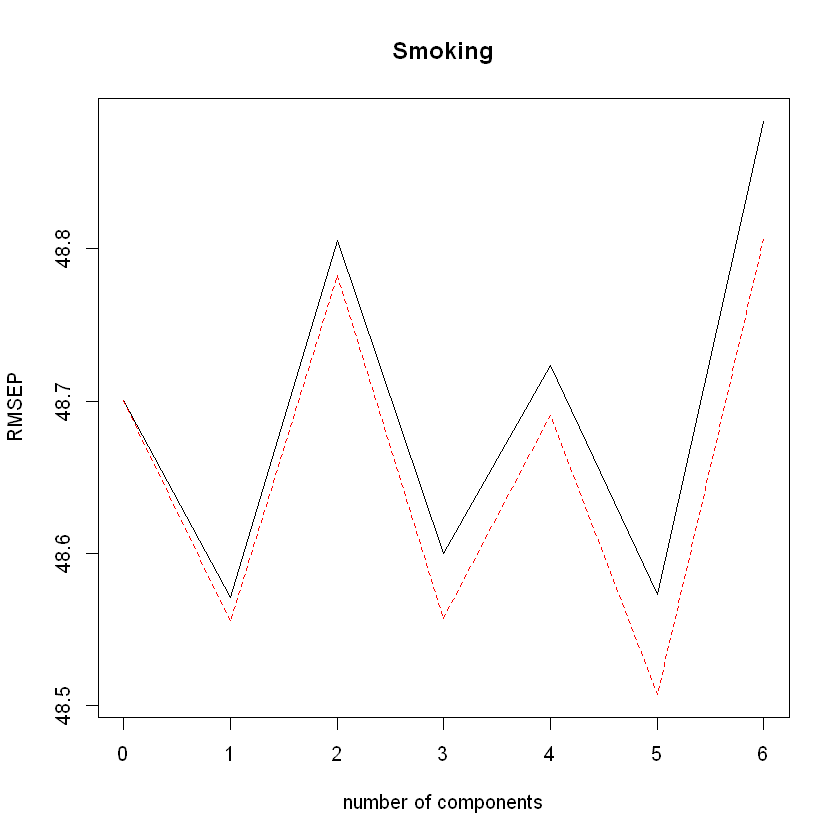

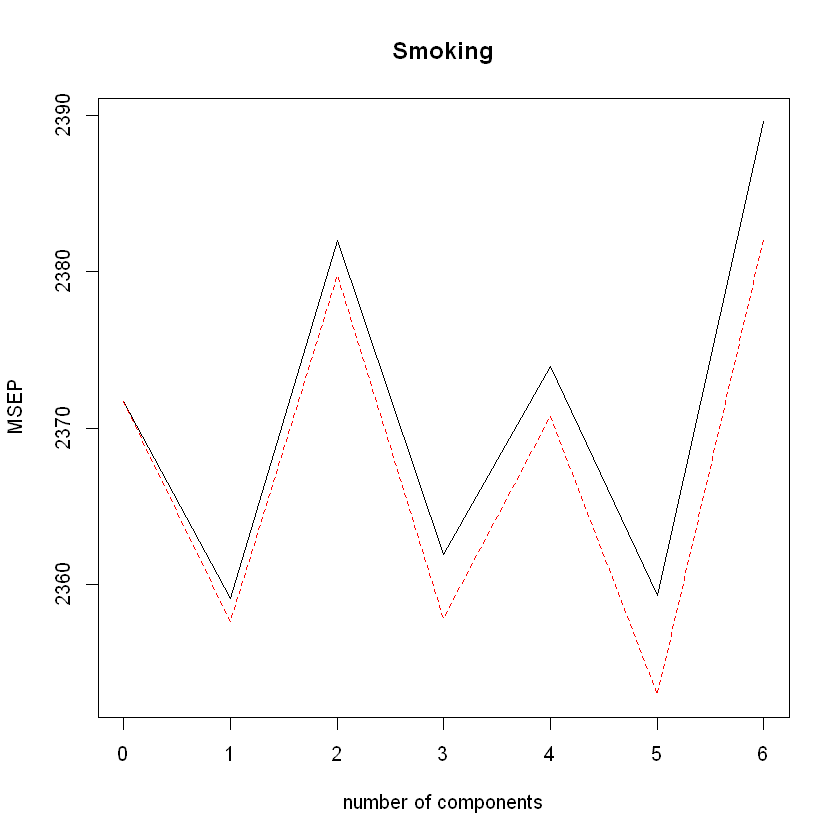

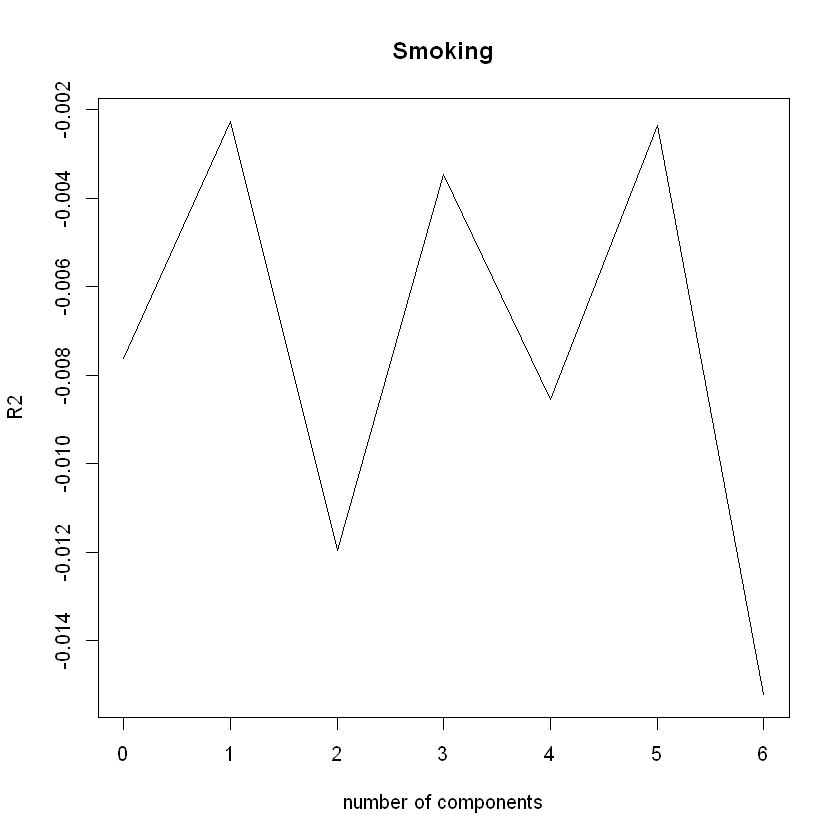

In [20]:
require(pls)
#+ BIS_self_control + as.factor(HIGHEST_LEVEL_EDUCATION)+BIS_Cog_Instability + BIS_self_control + BIS_Cog_Complexity + DOS_Recreational + DOS_Social
pcr_model <- pcr(Smoking ~ AGE + BIS_self_control +BIS_Cog_Instability + BIS_Cog_Complexity + DOS_Recreational + DOS_Social, data = data,scale = TRUE, validation = "CV")
summary(pcr_model)
validationplot(pcr_model)
validationplot(pcr_model, val.type="MSEP")
validationplot(pcr_model, val.type = "R2")

Warning message in par(nfrow = c(1, 1)):
""nfrow" is not a graphical parameter"

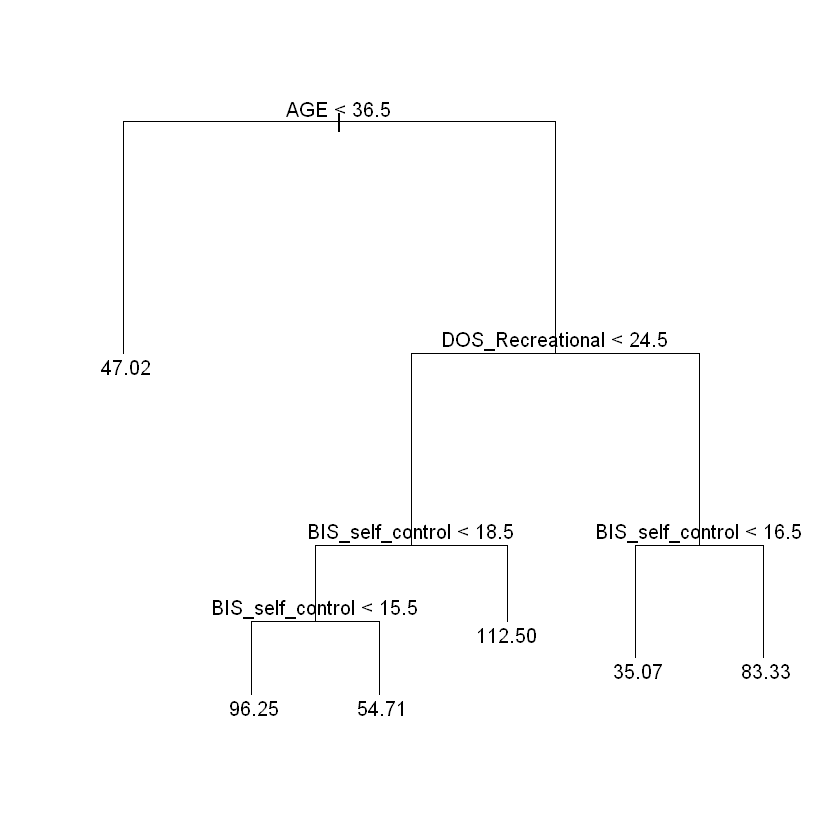

In [12]:
library(tree)
tree1 <- tree(Smoking ~ AGE + BIS_self_control +BIS_Cog_Instability + BIS_Cog_Complexity + DOS_Recreational + DOS_Social, data = data)

par(nfrow=c(1,1))
plot(tree1)
text(tree1)



Call:
lm(formula = Smoking ~ AGE + BIS_self_control + BIS_Cog_Instability + 
    BIS_Cog_Complexity + DOS_Recreational + DOS_Social, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-64.51 -36.37 -15.67  26.82 143.96 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)          16.6273    33.1055   0.502   0.6159  
AGE                   0.7091     0.3196   2.219   0.0274 *
BIS_self_control      1.2049     1.1528   1.045   0.2969  
BIS_Cog_Instability   1.9245     1.6693   1.153   0.2500  
BIS_Cog_Complexity   -1.2368     1.4369  -0.861   0.3902  
DOS_Recreational     -0.6113     0.3625  -1.687   0.0929 .
DOS_Social            0.3408     0.6212   0.549   0.5838  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 48.08 on 257 degrees of freedom
  (1064 observations deleted due to missingness)
Multiple R-squared:  0.04387,	Adjusted R-squared:  0.02155 
F-statistic: 1.965 on 6 and 257 DF,  p-value: 0.

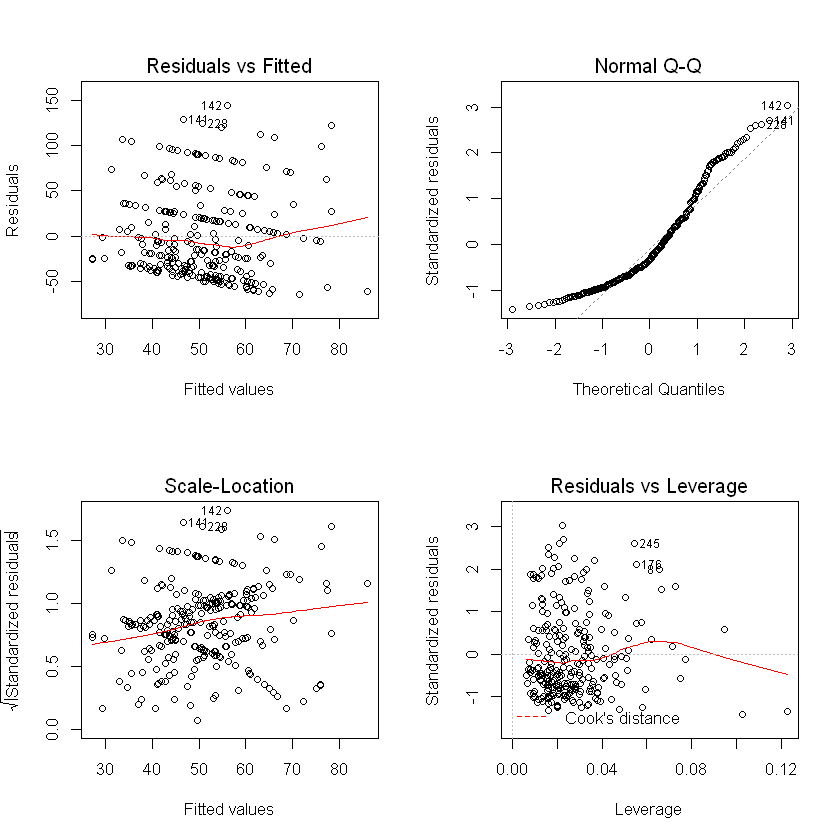

In [20]:
dog <- lm(Smoking ~ AGE + BIS_self_control +BIS_Cog_Instability + BIS_Cog_Complexity + DOS_Recreational + DOS_Social, data = data)
mm <- lm(Smoking ~ AGE, data=data)
print(summary(dog))

par(mfrow=c(2,2))
plot(dog)
p<-locator()

In [22]:
library(MASS)

step <- stepAIC(dog, direction="both")
step$anova # display results

Start:  AIC=2051.8
Smoking ~ AGE + BIS_self_control + BIS_Cog_Instability + BIS_Cog_Complexity + 
    DOS_Recreational + DOS_Social

                      Df Sum of Sq    RSS    AIC
- DOS_Social           1     695.7 594836 2050.1
- BIS_Cog_Complexity   1    1712.7 595853 2050.6
- BIS_self_control     1    2525.5 596666 2050.9
- BIS_Cog_Instability  1    3072.9 597213 2051.2
<none>                             594141 2051.8
- DOS_Recreational     1    6576.1 600717 2052.7
- AGE                  1   11381.5 605522 2054.8

Step:  AIC=2050.1
Smoking ~ AGE + BIS_self_control + BIS_Cog_Instability + BIS_Cog_Complexity + 
    DOS_Recreational

                      Df Sum of Sq    RSS    AIC
- BIS_Cog_Complexity   1    1594.6 596431 2048.8
- BIS_self_control     1    2336.8 597173 2049.1
- BIS_Cog_Instability  1    4145.6 598982 2049.9
<none>                             594836 2050.1
- DOS_Recreational     1    5886.0 600722 2050.7
+ DOS_Social           1     695.7 594141 2051.8
- AGE       

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,257,594140.5,2051.795
- DOS_Social,1,695.7159,258,594836.3,2050.104
- BIS_Cog_Complexity,1,1594.5670,259,596430.8,2048.811
- BIS_self_control,1,1671.2691,260,598102.1,2047.550
- BIS_Cog_Instability,1,3476.9021,261,601579.0,2047.080


In [24]:
ss<-step(dog,trace=0,k=500)
print(ss$anova)

RSSvec<-ss$anova[,5]
deltaRSSvec<-diff(RSSvec)
MSEvec<-RSSvec[2:length(RSSvec)]/ss$anova[2:length(RSSvec),4]
Fvec<-deltaRSSvec/MSEvec
pvals<-1-pf(Fvec,1,ss$anova[2:length(RSSvec),4])
out<-cbind(ss$anova[2:length(RSSvec),1],round(Fvec,3),round(pvals,5))
colnames(out)<-c("variable drop","F","p-value")
print(out)f

                   Step Df   Deviance Resid. Df Resid. Dev      AIC
1                       NA         NA       257   594140.5 5537.795
2          - DOS_Social  1   695.7159       258   594836.3 5038.104
3  - BIS_Cog_Complexity  1  1594.5670       259   596430.8 4538.811
4    - BIS_self_control  1  1671.2691       260   598102.1 4039.550
5 - BIS_Cog_Instability  1  3476.9021       261   601579.0 3541.080
6    - DOS_Recreational  1  4863.3120       262   606442.3 3043.206
7                 - AGE  1 14961.5066       263   621403.8 2549.640
     variable drop           F       p-value  
[1,] "- DOS_Social"          "0.302" "0.58326"
[2,] "- BIS_Cog_Complexity"  "0.692" "0.4061" 
[3,] "- BIS_self_control"    "0.727" "0.3948" 
[4,] "- BIS_Cog_Instability" "1.508" "0.22048"
[5,] "- DOS_Recreational"    "2.101" "0.14839"
[6,] "- AGE"                 "6.332" "0.01245"
